In [1]:
from sklearn import datasets, ensemble, model_selection, tree
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits=datasets.load_digits()

In [3]:
X=digits.data
y=digits.target


In [4]:
# DecisionTree
cvs=model_selection.cross_val_score(tree.DecisionTreeClassifier(), X,y, cv=10)

In [5]:
cvs.mean(axis=0)

0.8274647956183039

In [6]:
#Bagging Classifier
cvs1=model_selection.cross_val_score(ensemble.BaggingClassifier(n_estimators=100), X, y, cv=10)
cvs1.mean(axis=0)

0.9270858001268424

In [7]:
X.shape[1]

64

In [8]:
#Bagging Classifier with sqrt(D) parameter
cvs2=model_selection.cross_val_score(ensemble.BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1]))), X, y, cv=10)
cvs2.mean(axis=0)

0.932677020934106

In [9]:
#Bagging Classifier with sqrt(D) parameter in each decision tree
cvs3=model_selection.cross_val_score(ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features="sqrt", random_state=1), 
                                                                n_estimators=100, random_state=1), X, y, cv=10)
cvs3.mean(axis=0)


0.9500349636021452

In [10]:
#RandomForest - по сути, это то, что было  в предыдущем пункте.
cvs4=model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators=100,  random_state=1), X,y, cv=10)
cvs4.mean(axis=0)

0.9572130012266203

In [11]:
# Изучим влияние параметров RandomForest на качество через поиск по сетке: колич деревьев, глубина, число признаков,
#выбираемых при построении каждой вершины дерева


In [12]:
estimator=ensemble.RandomForestClassifier(random_state=1)
estimator.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [18]:
#Потестим  качество алгоритма при разном числе деревьев
params={"n_estimators" :[ 5, 20, 50, 100]       }

In [19]:
grid=model_selection.GridSearchCV(estimator, param_grid=params, cv=3)
grid.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
def plot_scores(optimizer):
    scores = [[item[0]['n_estimators'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    pylab.semilogx(scores[:,0], scores[:,1])
    pylab.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    pylab.show()

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


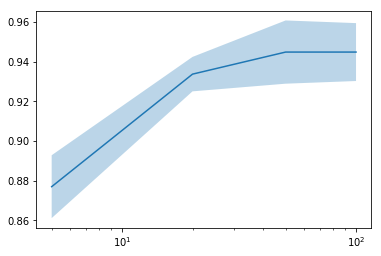

In [23]:
plot_scores(grid)

In [28]:
grid.best_params_

{'n_estimators': 50}

C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


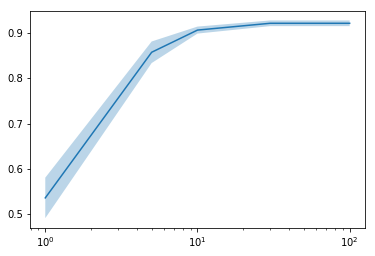

{'max_depth': 30}

In [32]:
#Потестим качество алгоритма при разной глубине


params={"max_depth" :[ 1, 5, 10, 30, 50, 100]       }
grid=model_selection.GridSearchCV(estimator, param_grid=params, cv=3)
grid.fit(X,y)
def plot_scores(optimizer):
    scores = [[item[0]["max_depth"], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    pylab.semilogx(scores[:,0], scores[:,1])
    pylab.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    pylab.show()
plot_scores(grid)
grid.best_params_


C:\Users\Admin\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


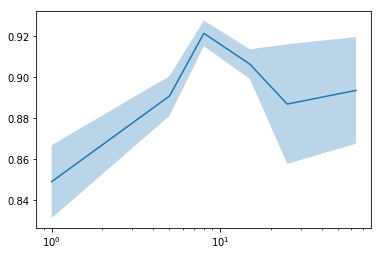

{'max_features': 8}

In [34]:
#Потестим качество алгоритма при разном числе признаков для построения вершин деревьев

params={"max_features" :[ 1, 5, 8, 15, 25, 64]       }
grid=model_selection.GridSearchCV(estimator, param_grid=params, cv=3)
grid.fit(X,y)
def plot_scores(optimizer):
    scores = [[item[0]["max_features"], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    pylab.semilogx(scores[:,0], scores[:,1])
    pylab.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    pylab.show()
plot_scores(grid)
grid.best_params_